### Calibration of wave gauge with temperature compensation ###

See other version in D:\Work\_Python3\And0K\tcm_cnv!

In [5]:
import pandas as pd
%history -g

 1/1:
print('PyDev console: using IPython 7.13.0\n')

import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['D:\\Work\\_Python3\\And0K\\h5toGrid', 'D:/Work/_Python3/And0K/h5toGrid'])
 1/2: row_set
 2/1: import sys; print('Python %s on %s' % (sys.version, sys.platform))
 2/2: chank.to_numeric()
 2/3: row_set.name
 3/1: import sys; print('Python %s on %s' % (sys.version, sys.platform))
 3/2: chunk.to_numeric()
 3/3:
for col in chunk:
    print(col.to_numeric())
 3/4: col
 3/5:
for col, typ in zip(chunk, types):
    if chunk[col].dtype == 'object':  # if isinstance(typ, str):   in ('object', 'string_', 'unicode_')
        print(chunk[col].map(len).max())
    else:
        print(col.to_numeric())
 3/6:
for col, typ in zip(chunk, types):
    if chunk[col].dtype == 'object':  # if isinstance(typ, str):   in ('object', 'string_', 'unicode_')
        print(chunk[col].map(len).max())
    else:
        print(chunk[col].to_numeric().dtype)
 3/7:
for col, typ in zip(c

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
import sys


In [2]:
# Custom importing function
# importing my functions
drive_d = 'D:' if sys.platform == 'win32' else '/mnt/D'  # to run on my Linux/Windows systems both
scripts_path = Path(drive_d + '/Work/_Python3/And0K/h5toGrid/inclinometer')
sys.path.append(str(Path(scripts_path).resolve()))
# from csv_load import load_from_csv_gen
path_in = Path(r'd:\WorkData\_experiment\inclinometer\230428_stand,tank,pres@ip1-6\_raw\INKL_P*.TXT')
# Load data
# for i, probe_id, path_csv, df_raw in load_from_csv_gen({'in': {'dir': path_in.parent, 'mask': path_in.mask}}):
#     break

In [17]:
# Probe mean values of recorded voltage, V and temperature, °C:
u = [1849660.6693944354,
3860225.026666667,
4854919.607407408,
1900765.9244966444,
4837516.648275862,
3850900.5529411766,
4827934.222222222,
3841864.2,
4816303.533333333,
3834839.5565217393,
4804418.110169492,
1879658.6861313868
]
t = [
21.840147299509006,
3.6073333333333335,
3.505259259259259,
2.7269463087248327,
5.238137931034483,
5.791411764705882,
5.840962962962964,
6.979565217391306,
7.08506666666667,
8.220434782608697,
8.280423728813556,
9.907372262773722
]
# u = [[0.862565, 1.67355], [0.846437, 1.65218], [0.822848, 1.61338]]  # Voltage
# t = [[1.74295, 2.16332], [8.63737, 8.73015], [19.1236, 19.2093]]     # Temperature
# x_values = np.column_stack((np.ravel(u), np.ravel(t)))

# Atmospheric pressure, dBar:
y_a = 1000  # 1008.5/100  # 1008.5 hPa
# Real pressure, dBar:
ref_possible = np.float64([0, 1, 1.5])
i_exp = [
    np.argmin(abs(ref_possible - u_cur)) for u_cur in 
    np.min(ref_possible) + (np.max(ref_possible) - np.min(ref_possible))*(u - np.min(u))/(np.max(u) - np.min(u))       
]
y = ref_possible[i_exp].flatten()
# y = y_a + np.array([[0, 1*9.80665]]*3)  # converted from source values [0, 1 kg/cm2]

data = pd.DataFrame.from_dict({'P': y, 'u': u, 't': t})
print('Probe real pressure, dBar:; pressure PCB output voltage; temperature\n', data)
x_values = data[['u', 't']]
print(f'Samples x features {x_values.columns.to_list()} size: {x_values.shape}')

Probe real pressure, dBar:; pressure PCB output voltage; temperature
       P             u          t
0   0.0  1.849661e+06  21.840147
1   1.0  3.860225e+06   3.607333
2   1.5  4.854920e+06   3.505259
3   0.0  1.900766e+06   2.726946
4   1.5  4.837517e+06   5.238138
5   1.0  3.850901e+06   5.791412
6   1.5  4.827934e+06   5.840963
7   1.0  3.841864e+06   6.979565
8   1.5  4.816304e+06   7.085067
9   1.0  3.834840e+06   8.220435
10  1.5  4.804418e+06   8.280424
11  0.0  1.879659e+06   9.907372
Samples x features ['u', 't'] size: (12, 2)


In [26]:
# from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#define our polynomial model, with whatever degree we want
degrees = [1, 2]
for degree in degrees:
    # PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
    # of the features with a degree less than or equal to the degree we just gave the model (2)
    poly_model = PolynomialFeatures(degree=degree, include_bias=False)
    
    # transform out polynomial features
    poly_x_values = poly_model.fit_transform(x_values)
    
    # For degree=2 should be in the form [1, a, b, a^2, ab, b^2]
    # print(f'initial values {x_values[0]} mapped to:\n{poly_x_values[0]}')
    coef_cols = poly_model.get_feature_names_out()

    # Fit the model
    regr = LinearRegression()    # we use linear regression as a base!!! ** sometimes misunderstood **
    regr.fit(poly_x_values, y)
    
    #print(poly_x_values)
    
    y_pred = regr.predict(poly_x_values)
    print(
        f'Fitted polynominal of degree {degree}:\n y =', (' + '.join([f'{regr.intercept_:.5g}'] + [
            f"{coef:.5g} * {name.replace(' ', ' * ')}" for coef, name in zip(regr.coef_, poly_model.get_feature_names_out())]
        )).replace('+ -', '- '),
    )
    mse = mean_squared_error(y, y_pred, squared=False)
    print(f'Mean squared error: {mse:.3g}')

Fitted polynominal of degree 1:
 y = -0.97818 + 5.1131e-07 * u + 0.0016616 * t
Mean squared error: 0.0044
Fitted polynominal of degree 2:
 y = -0.96274 + 5.0539e-07 * u - 0.0009643 * t - 2.9013e-16 * u^2 + 1.2132e-09 * u * t + 2.1202e-06 * t^2
Mean squared error: 0.00115


u(min,max): 1849660.6693944354 4854919.607407408 t(min,max): 2.7269463087248327 21.840147299509006 P(min,max): 0.0 1.5


TypeError: Axes.scatter() got multiple values for argument 's'

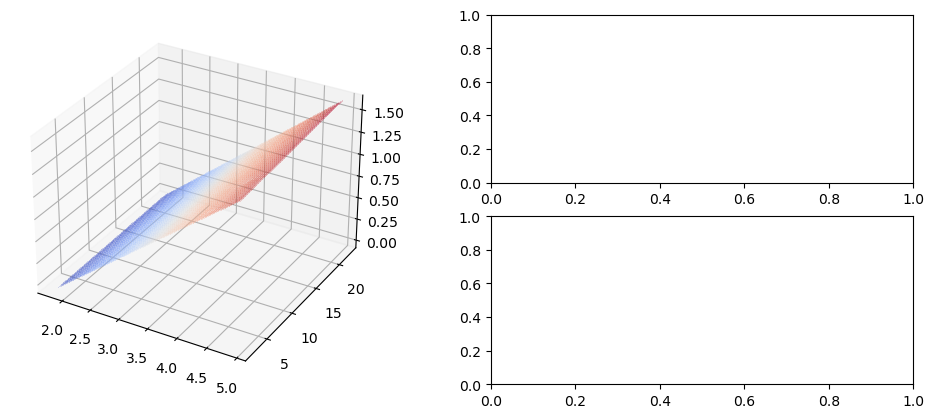

In [40]:
# Show plots 
# %matplotlib inline  # is it realy changes something in juputerlab
fig = plt.figure(figsize=plt.figaspect(0.4))
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4, sharex=ax2)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Plot result surface
u_min, u_max, t_min, t_max, P_min, P_max = np.min(u), np.max(u), np.min(t), np.max(t), np.min(y_values), np.max(y_values)
print('u(min,max):', u_min, u_max, 't(min,max):', t_min, t_max, 'P(min,max):', P_min, P_max)
ptp_u, ptp_t = u_max - u_min, t_max - t_min
n = 50
X = np.linspace(u_min - ptp_u/n, u_max + ptp_u/n, n)
Y = np.linspace(t_min - ptp_t/n, t_max + ptp_t/n, n)
X, Y = np.meshgrid(X, Y)
Z_in = np.column_stack((X.ravel(), Y.ravel()))
Z = regr.predict(poly_model.fit_transform(Z_in)).reshape(X.shape)
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.2)
ax1.scatter3D(*x_values.T, y_values, color='k')
ax1.set_xlabel('voltage, V')
ax1.set_ylabel('temperature, °C')
ax1.set_zlabel('P, dBar')  # pressure
ax1.set_title('Fitting');

# Plot predictions lines for each sub experiment in assumption that external values changes linear between fitting points
# experiment's colors
c_experiments = cm.rainbow(np.linspace(0, 1, max(i_exp) + 1))
# fitting points
ax2.scatter(x_values[:,0], y_values, c=c_experiments[i_exp])
# predictions
print('Errors of fit for experiments with different mean temperature:')
for u_exp, t_exp, y_exp, c_exp in zip(u, t, y, c_experiments):
    # print(u_exp, t_exp)
    u_min, u_max, t_min, t_mean, t_max = np.min(u_exp), np.max(u_exp), np.min(t_exp), np.mean(t_exp), np.max(t_exp)
    # print('u(min,max):', u_min, u_max, 't(min,max):', t_min, t_max)
    X = np.linspace(u_min, u_max , n)
    Y = np.linspace(t_min, t_max , n)
    Z_in = np.column_stack((X, Y))
    Z = regr.predict(poly_model.fit_transform(Z_in))
    Z_bad = regr.intercept_ + (regr.coef_[1:] * Z_in).sum(axis=1)
    np.testing.assert_array_equal(Z, Z_bad)
    
    ax2.plot(X, Z, color=c_exp, label=f'{t_mean:.1f}')
    
    z_diff = y_exp - regr.predict(poly_model.fit_transform([[u_min, t_min], [u_max, t_max]]))
    print(f'{t_mean:.1f}:', z_diff)
    
    ax3.bar([u_min, u_max], z_diff, width=0.1, color=c_exp)
    ax3.set_xlabel('voltage, V')
    ax3.set_ylabel('P - P_fit, dBar')
ax2.legend(title='mean t, °C')
ax2.grid()
ax3.grid()

In [191]:
# Use formula for other data
u = [0.841866, 0.926501, 1.00791, 1.08949, 1.17089, 1.25182]
t = [15.0949, 15.0421, 14.9854, 14.9287, 14.884, 14.8525]
# Atmospheric pressure, dBar:
y_a = 1013/100  # 1008.5 hPa
# Real pressure, dBar:
y = y_a + np.append(0, np.arange(1.045, 1.045*(5 + 0.0001), 1.000))  # *9.80665
z = regr.predict(poly_model.fit_transform(np.column_stack((u, t))))
np.column_stack((y, z, y - z))

[10.24663252 11.27823713 12.27031087 13.26447269 14.25686189 15.24397984]


array([[10.13      , 10.24663252, -0.11663252],
       [11.175     , 11.27823713, -0.10323713],
       [12.175     , 12.27031087, -0.09531087],
       [13.175     , 13.26447269, -0.08947269],
       [14.175     , 14.25686189, -0.08186189],
       [15.175     , 15.24397984, -0.06897984]])

In [ ]:
# display fitted polynom formula (not tried)
def join_txt(text,delim='*'):
    return np.asarray(delim.join(text),dtype=object)

if True: 
    variable_names=poly.get_feature_names_out(X.columns)
    variable_names=np.core.defchararray.replace(variable_names.astype(str),' ','*')    

    fit_coeffs=["{:0.5g}".format(x) for x in fit.coef_]

    arr_list=[fit_coeffs,variable_names]
    fit_equation=np.apply_along_axis(join_txt, 0, arr_list)
    fit_equation='+'.join(fit_equation)
    fit_equation=fit_equation.replace("*1+","+")
    fit_equation=fit_equation.replace("+-","-")

    print("Fit equation:")    
    print(fit_equation)

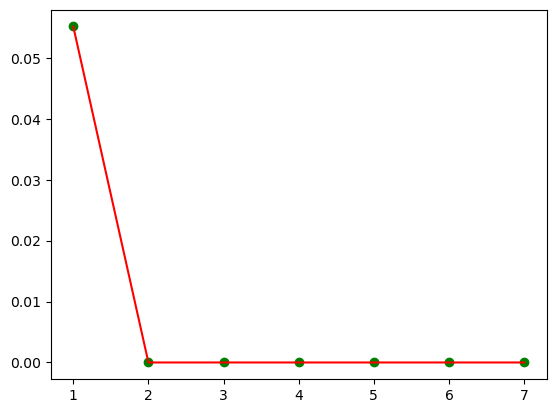

In [46]:
# check our accuracy for each degree, the lower the error the better!
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 